# Importing:

In [26]:
# munging imports
import pandas as pd 
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# Collecting and Exploring:

In [27]:
df=pd.read_csv("cardio_train.csv", sep=';')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [28]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [29]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### Data features:

ID: id number, int

Age: Objective Feature,int, age in days

Gender: Objective Feature, int, gender in categorical code "Female=1 , Male=2"

Height: Objective Feature,int, height in cm

Weight: Objective Feature,float, weightin in kg

Systolic blood pressure: Examination Feature, int, ap_hi

Diastolic blood pressure: Examination Feature, int, ap_lo

Cholesterol: Examination Feature, int, cholesterol "normal=1 , above normal=2, well above normal=3"

Glucose: Examination Feature,int, gluc "normal=1, above normal=2, well above normal=3"

Smoking: Subjective Feature, int, smoke in binary "smoke=1, not smoke=0"

Alcohol intake: Subjective Feature,int, alco in binary "drink=1, not drink=0"

Physical activity: Subjective Feature, int, active in binary "active=1 , not active=0"

Presence or absence of cardiovascular disease: Target Variable, int, cardio in binary "cardiovascular disease=1, no cardiovascular disease=0"

In [30]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#####  we can see that ap_hi has a min of  -150.000000 and ap_lo has min of -70.000000 which is wrong, there is no negative value of blood pressure. we can deticte that there is missing value.

##### also, min of weight is equal to 10km and min height is equal to 55cm for an adul. which in this case consedered as outliers and we can deal with it as replacing them with the mean of each of them depending on gender.

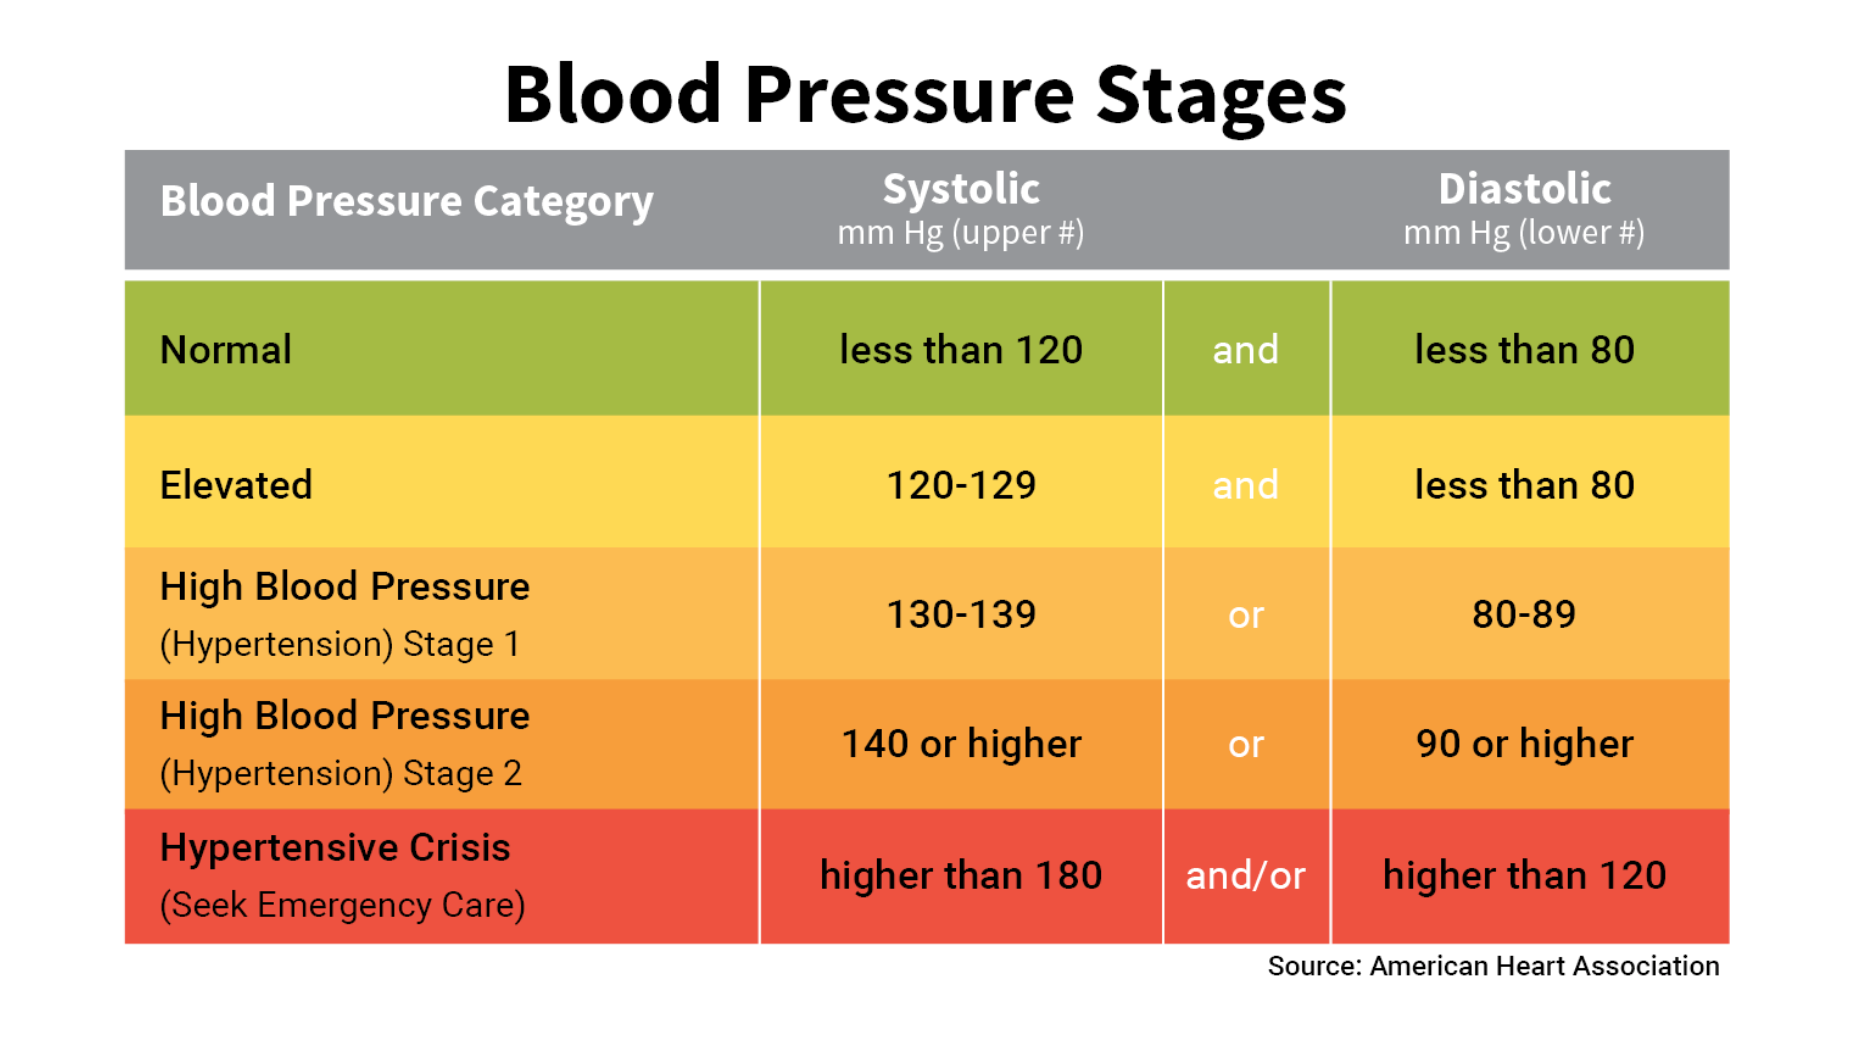

In [31]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [32]:
def bpstages(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high stage 1'
    elif x<=180 or y<=120:
        return "high stage 2"
    elif x>180 or y>120:
        return 'hypertensive crisis'
    else:
        return None
    
df.insert(8, "BPC", df.apply(lambda row: bpstages(row['ap_hi'], row['ap_lo']), axis=1))
df['BPC'].value_counts()

#bpstages means blood pressure stages, and I categorized it according to the systolic and diastolic pressure.
#BPC means blood pressure categories, and I labled it based on the patients blood pressure like normal, elevated, high stage 1, high stage 2 or hypertensive crisis.

normal                 38895
high stage 1           15211
high stage 2           14211
elevated                 419
hypertensive crisis       28
Name: BPC, dtype: int64

In [59]:
# mean of Female
(df[(df['gender'] == 1)]).mean()

gender           1.000000
height         169.947155
weight          77.175488
ap_hi          127.996705
ap_lo           82.255589
cholesterol      1.330706
gluc             1.209543
smoke            0.219219
alco             0.106315
active           0.806515
cardio           0.499791
age             53.113015
dtype: float64

In [60]:
# mean of Male
(df[(df['gender'] == 2)]).mean()

gender         NaN
height         NaN
weight         NaN
ap_hi          NaN
ap_lo          NaN
cholesterol    NaN
BPC            NaN
gluc           NaN
smoke          NaN
alco           NaN
active         NaN
cardio         NaN
age            NaN
dtype: object

In [61]:
df_Female = df[(df['gender'] == 1)]


df_Female['height']= df_Female['height'].apply(lambda x: ( 161.37 if x < 150 else x))
df_Female['height']= df_Female['height'].apply(lambda x: ( 161.37 if x > 181 else x))

df_Female['weight']= df_Female['weight'].apply(lambda x: (72.48 if x < 63 else x))
df_Female['weight']= df_Female['weight'].apply(lambda x: (72.48 if x > 94 else x))

<ipython-input-61-cf838a20ddd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Female['height']= df_Female['height'].apply(lambda x: ( 161.37 if x < 150 else x))
<ipython-input-61-cf838a20ddd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Female['height']= df_Female['height'].apply(lambda x: ( 161.37 if x > 181 else x))
<ipython-input-61-cf838a20ddd6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [62]:
df_Male = df[(df['gender'] == 2)]

df_Male['height'] = df_Male['height'].apply(lambda x: (169.94 if x < 155 else x))
df_Male['height'] = df_Male['height'].apply(lambda x: (169.94 if x > 190 else x))

df_Male['weight'] = df_Male['weight'].apply(lambda x: (77.17 if x < 54 else x))
df_Male['weight'] = df_Male['weight'].apply(lambda x: (77.17 if x > 110 else x))

In [37]:
df.drop('id',axis='columns',inplace=True) #id is unnecessary featuer

In [38]:
df['ageinyears'] = df['age'] / 365        #to change age from days to years
df= df.drop('age', axis=1)


In [39]:
df.rename({"ageinyears":"age"},axis=1, inplace=True)

In [40]:
df.sample(5)

,gender,height,weight,ap_hi,ap_lo,cholesterol,BPC,gluc,smoke,alco,active,cardio,age
38798,1,164,64.0,120,80,1,normal,1,0,0,1,0,58.065753
30396,2,168,109.0,140,90,1,high stage 2,1,0,0,1,1,58.021918
15429,2,165,53.0,130,80,1,high stage 1,1,1,0,1,0,64.178082
50860,2,167,75.0,130,90,1,high stage 1,1,0,0,1,0,44.112329
11427,1,167,70.0,120,80,2,normal,1,0,0,0,0,61.838356


In [63]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
count,68740.000000,68740.000000,68740.000000,68740.000000,68740.000000,68740.000000,68740.000000,68740.000000,68740.000000,68740.000000,68740.000000,68740.000000
mean,0.348793,164.361274,74.123225,126.602560,81.373553,1.364824,1.226098,0.088042,0.053637,0.803346,0.494923,53.327320
std,0.476592,8.186164,14.331825,16.720529,9.643946,0.679080,0.572098,0.283358,0.225301,0.397471,0.499978,6.762481
min,0.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562
25%,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.375342
50%,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.975342
75%,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.421918
max,1.000000,250.000000,200.000000,220.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123


In [42]:
df.isna()

,gender,height,weight,ap_hi,ap_lo,cholesterol,BPC,gluc,smoke,alco,active,cardio,age
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df.dtypes

gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
BPC             object
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age            float64
dtype: object

In [44]:
# Gender: Female= 0  and Male=1
df['gender']=df['gender']-1

In [45]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,BPC,gluc,smoke,alco,active,cardio,age
0,1,168,62.0,110,80,1,normal,1,0,0,1,0,50.391781
1,0,156,85.0,140,90,3,high stage 2,1,0,0,1,1,55.419178
2,0,165,64.0,130,70,3,high stage 1,1,0,0,0,1,51.663014
3,1,169,82.0,150,100,1,high stage 2,1,0,0,1,1,48.282192
4,0,156,56.0,100,60,1,normal,1,0,0,0,0,47.873973


In [67]:
df.describe().T[0:]

,count,mean,std,min,25%,50%,75%,max
gender,68740.0,0.348793,0.476592,0.000000,0.000000,0.000000,1.000000,1.000000
height,68740.0,164.361274,8.186164,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68740.0,74.123225,14.331825,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68740.0,126.602560,16.720529,60.000000,120.000000,120.000000,140.000000,220.000000
ap_lo,68740.0,81.373553,9.643946,40.000000,80.000000,80.000000,90.000000,180.000000
cholesterol,68740.0,1.364824,0.679080,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,68740.0,1.226098,0.572098,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68740.0,0.088042,0.283358,0.000000,0.000000,0.000000,0.000000,1.000000
alco,68740.0,0.053637,0.225301,0.000000,0.000000,0.000000,0.000000,1.000000
active,68740.0,0.803346,0.397471,0.000000,1.000000,1.000000,1.000000,1.000000


In here we can conclude that:

The percentage of males is 35% while the percentage of females is 65%.

The mean height of patients is 164.37 cm.

The mean weight of patients is 74.12 Kg.

The percentage of smokers is 8%.

The percentage of alcoholists is 5%.

The percentage of Active patients is 80%.

The mean age for patient is 53 years.

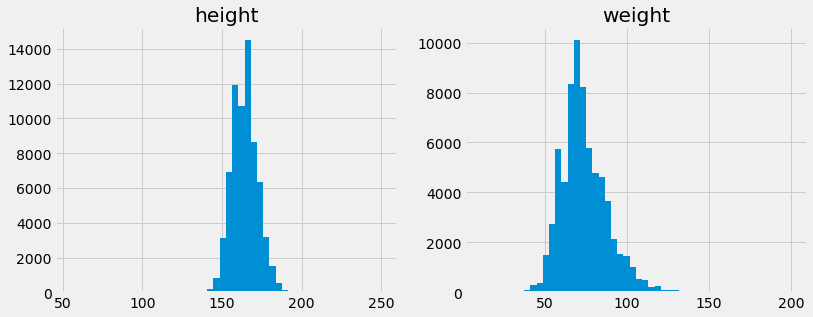

In [47]:
#to check if still we have outliers in height and weight
plt.figure(figsize=(12,10))

he= plt.subplot(221)
he= plt.hist(df['height'], bins=50)
he= plt.title('height')

we= plt.subplot(222)
we= plt.hist(df['weight'], bins=50)
we= plt.title('weight')


In [48]:
df.sample(6)

,gender,height,weight,ap_hi,ap_lo,cholesterol,BPC,gluc,smoke,alco,active,cardio,age
53368,1,165,68.0,120,80,1,normal,1,0,0,1,0,58.342466
62434,1,175,135.0,180,100,1,high stage 2,1,1,0,1,1,61.646575
66140,1,178,100.0,140,90,1,high stage 2,1,1,0,1,0,54.706849
68858,1,166,66.0,120,80,1,normal,1,0,0,0,1,47.164384
63625,0,164,72.0,120,80,1,normal,3,0,0,1,0,55.326027
39907,1,170,92.0,140,100,2,high stage 2,1,0,0,1,1,63.424658


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68764 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68764 non-null  int64  
 1   height       68764 non-null  int64  
 2   weight       68764 non-null  float64
 3   ap_hi        68764 non-null  int64  
 4   ap_lo        68764 non-null  int64  
 5   cholesterol  68764 non-null  int64  
 6   BPC          68764 non-null  object 
 7   gluc         68764 non-null  int64  
 8   smoke        68764 non-null  int64  
 9   alco         68764 non-null  int64  
 10  active       68764 non-null  int64  
 11  cardio       68764 non-null  int64  
 12  age          68764 non-null  float64
dtypes: float64(2), int64(10), object(1)
memory usage: 7.3+ MB


In [50]:
df.duplicated().sum()   # to check if i have duplicate

24

In [51]:
df.drop_duplicates(inplace=True)   # to remove the duplicate rows

In [52]:
X=df[['age','height','gender','weight','ap_hi','ap_lo','cholesterol','BPC','gluc','smoke','alco','active']]
y=df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [53]:
X_train.head()

,age,height,gender,weight,ap_hi,ap_lo,cholesterol,BPC,gluc,smoke,alco,active
14820,55.731507,174,0,65.0,120,80,1,normal,1,0,0,1
32692,58.221918,155,0,62.0,140,90,3,high stage 2,1,0,0,1
16744,60.224658,165,1,67.0,120,80,1,normal,1,1,0,1
42231,55.487671,169,0,82.0,120,80,1,normal,1,0,0,1
42544,51.575342,168,1,70.0,130,80,1,high stage 1,1,0,0,1


In [54]:
# to check the data balance
df['cardio'].sum()/len(df) *100

49.49228978760547

In [55]:
train_df = X_train.copy()
train_df['cardio'] = y_train
train_df.head()

,age,height,gender,weight,ap_hi,ap_lo,cholesterol,BPC,gluc,smoke,alco,active,cardio
14820,55.731507,174,0,65.0,120,80,1,normal,1,0,0,1,1
32692,58.221918,155,0,62.0,140,90,3,high stage 2,1,0,0,1,0
16744,60.224658,165,1,67.0,120,80,1,normal,1,1,0,1,0
42231,55.487671,169,0,82.0,120,80,1,normal,1,0,0,1,0
42544,51.575342,168,1,70.0,130,80,1,high stage 1,1,0,0,1,1


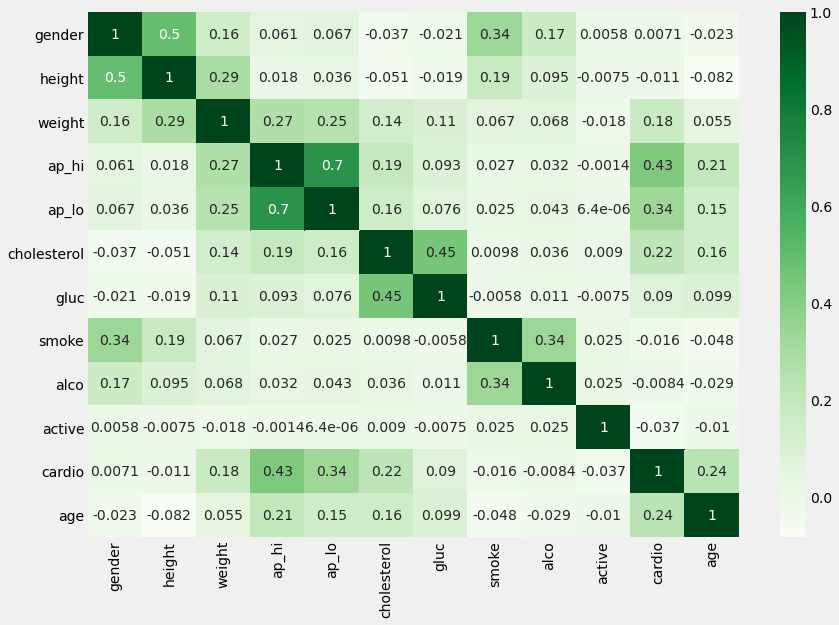

In [56]:
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),annot=True ,cmap='Greens')
plt.show()

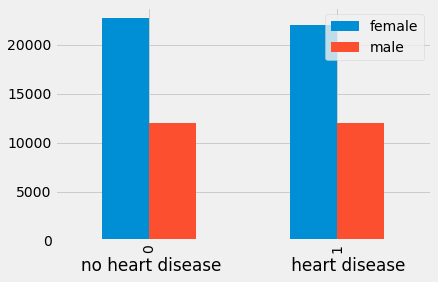

In [57]:
pd.crosstab(df['cardio'], df['gender']).plot(kind = 'bar')
plt.xlabel('no heart disease             heart disease')
plt.legend(['female','male'],loc='upper right')
plt.show()

##### according to the plot, we can see that male in both cases of having or not having a heart disease is almost the same value while female who has a heart disease is slightly lower than females who have it. also by comparing between of gender the mejority of heart disease patients are females with more than 20,000 patients.

In [68]:
lr = LogisticRegression()

In [69]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'normal'

In [66]:
y_pred = lr.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.